In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Chapter 1. 
###Using Neural Networks to Recognize Handwritten Digits

In this chapter we discuss some basics of neural networks, including two types of neuron analogs, the perceptron and the sigmoid neuron, a method for training networks, stochastic gradient descent, and build a simple network to recognize handwritten digits.

**Perceptrons**

Perceptrons function quite simply. They take binary inputs and combine them to provide a binary output, through a simple linear operation. For example, given inputs $x_1$, $x_2$, $x_3$, the perceptron will perform a weighted sum of these inputs $\sum_jw_jx_j$ and respond with a 0 if the result is below a threshold value or a 1 if it is above a threshold value. To improve our notation, however, we use the following for out output equation:

$$
\text{output}=
\begin{cases}
0, \mbox{ if } \mathbf{w}^T\mathbf{x} + b \leq 0 \\
1, \mbox{ if } \mathbf{w}^T\mathbf{x} + b > 0,
\end{cases}
$$

where $b$ is the *bias,* which is the negative of our threshold.

One useful feature of the perceptron is that it can compute any logical function, for example AND, OR, or NAND by adjusting the weights and threshold appropriately. A NAND gate can be constructed, for example, by taking the two weights to be -2 and the bias to be +3.

In [4]:
def nand(x1, x2):
    output = 1
    if (-2*x1 + -2*x2 + 3) < 0:
        output = 0
    return output

In [5]:
nand(1,1)

0

One major shortcoming of the perceptron is that it is not clear how to get a network of perceptrons to learn in a stable manner. That is, ideally if the network's output is incorrect, we could slightly modify some subset of the weights to produce a small change in the output. However, weight modification in perceptron networks is a risky business, as the output is likely to flip from 0 to 1 with slight weight modifications and to have widespread effects on the output class for a variety of inputs.

**Sigmoid Neurons**

Sigmoid neurons, also called logistic neurons, overcome this problem by taking any value in the range of 0 to 1. A sigmoid neuron's output is given by

$$
\sigma(z) = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-(\mathbf{w}^T\mathbf{x}+b)}}
$$


In [29]:
def sigmoid(z):
    return (1 + np.exp(-z))**-1

(-5.0, 5.0)

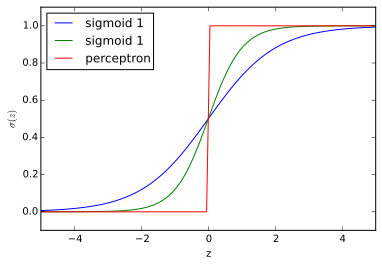

In [46]:
z = np.linspace(-5,5,100)
plt.plot(z, sigmoid(z), label='sigmoid 1')
plt.plot(z, sigmoid(2*z), label='sigmoid 1')
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
plt.plot(z, z>0, label='perceptron')
plt.legend(loc='best')
plt.ylim(-.1, 1.1)
plt.xlim(z[0], z[-1])

Using the sigmoid *activation function* now allows for small changes in weights and biases to have small effects on the output.

$$
\Delta y \approx \sum_j\frac{\partial y}{\partial w_j}\Delta w_j + \frac{\partial y}{\partial b}\Delta b
$$

**Learning with Gradient Descent**

The goal is to find a set of weights and biases that well approximates our desired output given our input data. Typically, how close we are to this goal is quantified with a *cost function*, one of the most common of which is the *Mean Squared Error (MSE)*, also called a *quadratic* cost/loss function:

$$
C(w,b) = \frac{1}{2n}\sum_x\|y(x) - a\|^2,
$$

with $a = \mathbf{w}^T\mathbf{x} + \mathbf{b}$.

Our goal is to minimize this function by finding the right set of weights and biases to do so. In some instances, we could use calculus and find the derivatives of the cost function with respect to each variable. However, one problem with this approach is that we have to find derivatives with respect to each variable, and in a neural network there can be billions of weights and biases, making this approach clearly impractical.

We will use a related approach, however, called *gradient descent*. Here we should think of our cost function as a surface in our variable space where each dimension corresponds to the value of one of our variables (weights or biases). We want to find the lowest point (the minimum) of this surface, and to do this we will make small steps in each component direction and assess how this affects our cost function value. Let's consider a case where our cost function $C(v)$ is a function of two variables $v_1, v_2$. In this case, the change in our cost function,

$$
\Delta{C} \approx \frac{\partial C}{\partial v_1}\Delta{v_1} + \frac{\partial C}{\partial v_2}\Delta{v_2}.
$$

Writing $\Delta{v_1}$ and $\Delta{v_2}$ as the vector $\Delta{v}$, we want to choose $\Delta{v}$ such that $\Delta{C}$ is negative. We can also write the partial derivatives above as a vector as well, which we will call the *gradient* of $C$.

$$
\nabla{C} \equiv \Big(\frac{\partial C}{\partial v_1}, \frac{\partial C}{\partial v_2} \Big)^T.
$$

With this notation we can write,
$$
\Delta{C} = \nabla{C}\cdot\Delta{v}.
$$

Recall, our goal is to minimize $C$, we can guarantee that $C$ decreases if we set $\Delta{v} = -\eta\nabla{C}$ with $\eta > 0$, because, in this case, $\Delta{C} = -\eta\|\nabla{C}\|^2$, which given our assumptions will always be negative. We call the parameter $\eta$ the *learning rate*. Determining the value of the learning rate is key, as values that are too small mean the algorithm will work very slowly, but values that are too large can result in bad approximations and increases in $C$. Thus, our update rule is:

$$
v \to v' = v - \eta\nabla{C}
$$

Note that according to the Cauchy-Schwarz Inequality, where $\mathbf{\nabla{C}}^T\mathbf{\Delta{v}} \leq \|\mathbf{\nabla{C}}\|\|\mathbf{\Delta{v}}\|$, we can see that the left hand side, which is equal to $\Delta{C}$, is maximized when $\Delta{v} = \nabla{C}.$

Putting this update rule into terms more directly related to our neural networks, we have:

$$
w_k \to w_k' = w_k - \eta\frac{{\partial C}}{{\partial w_k}} \\
b_l \to b_l' = b_l - \eta\frac{{\partial C}}{{\partial b_l}}
$$

Notice that our cost function above is an average of costs for each data point. This means that a cost is evaluated for each data point, and therefore, the time required to perform these calculations increases with the size of the data set and can become quite costly.

**Stochastic Gradient Descent**

One way around this problem is through *stochastic gradient descent* where a random sample of the input data is used to estimate the gradient $\nabla{C}$. To formalize this a bit more, we take a random sample of size $m$ from the data set and refer to this sample as a *mini-batch*, which we denote $X_j$. On average 

$$
\frac{\sum_{j=1}^{m}\nabla{C_{X_j}}}{m} \approx \frac{\sum_{i=1}^{n}\nabla{C_x}}{n},
$$

and our update equations become

$$
w_k \to w_k' = w_k - \frac{\eta}{m}\frac{{\partial C_{X_j}}}{{\partial w_k}} \\
b_l \to b_l' = b_l - \frac{\eta}{m}\frac{{\partial C_{X_j}}}{{\partial b_l}}
$$

After training is done with the first $X_j$ set, another run with a different mini-batch is completed, until the dat are exhausted, at which time a training *epoch* has been completed.

Thus, while stochastic gradient descent sounds much more complicated than regular gradient descent, the only difference is that the training data are broken into smaller sets called mini-batches and training is done on each of these subset until an *epoch* is completed.

**Implementing a Neural Network for Digit Classification**

In [1]:
import mnist_loader

In [4]:
import network as Network

In [5]:
net = Network([2, 3, 1])

TypeError: 'module' object is not callable